# Chapter 3: Feed-Forward Neural Networks

## 3.1 Perceptron

### Boolean AND as Perceptron

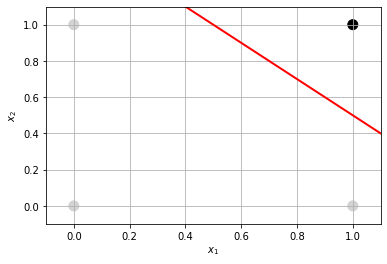

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x0 = np.array([0, 0, 1, 1])
x1 = np.array([0, 1, 0, 1])
x = np.arange(-0.1, 1.1, 0.1)

plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.scatter(x0, x1, c=['lightgrey','lightgrey','lightgrey','black'], s=100)
plt.plot(x, 1.5 - x, c='red', linewidth=2)
plt.show()

### Boolean OR as Perceptron

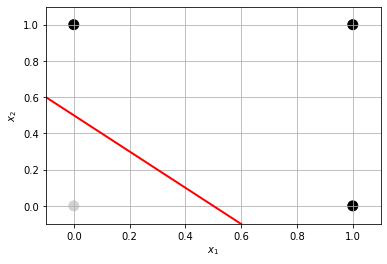

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x0 = np.array([0, 0, 1, 1])
x1 = np.array([0, 1, 0, 1])
x = np.arange(-0.1, 1.1, 0.1)

plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.scatter(x0, x1, c=['lightgrey','black','black','black'], s=100)
plt.plot(x, 0.5 -x, c='red', linewidth=2)
plt.show()

### Limitations of a Single Perceptron (XOR)

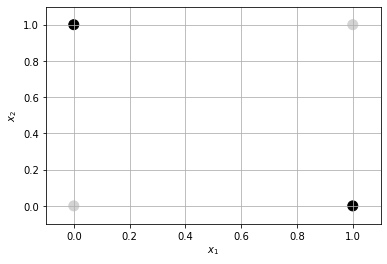

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x0 = np.array([0, 0, 1, 1])
x1 = np.array([0, 1, 0, 1])

plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.scatter(x0, x1, c=['lightgrey','black','black','lightgrey'], s=100)
plt.show()

## 3.2 Combining Multiple Perceptrons

Nothing to show here.

## 3.3 Sigmoid Neuron

In this example, we learn the parameters of a single Sigmoid Neuron based on the gradient that we developed in the lecture.

In [4]:
import math
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# data matrix
X = np.matrix([[1.00, 0.00, 0.00], 
               [1.00, 0.25, 0.75], 
               [1.00, 0.25, 1.00], 
               [1.00, 0.75, 0.25], 
               [1.00, 0.75, 0.00], 
               [1.00, 1.00, 1.00]])

# target vector
y = np.matrix([[0], 
               [0], 
               [0], 
               [1], 
               [1], 
               [1]])

# parameter vector (initialized as 0.5)
w = np.matrix([[0.50], 
               [0.50], 
               [0.50]])

# number of epochs
num_epochs = 20

# learning rate
eta = 0.1

# non-vectorized implementation 
for e in range(0, num_epochs):
    
    # gradient 
    gradient = np.zeros(w.shape)
    
    # consider all data points (i. e., every row of X)
    for i in range(0, X.shape[0]):

        # compute prediction for this data point
        y_hat = sigmoid(X[i,:]*w)       
        
        # compute error
        error = (y_hat - y[i])
        
        # gradient computed for this data point
        gradient += X[i,:].transpose()*error        
    
    # update weight vector
    w = w - eta*gradient

    print("Current predictions:")
    print(sigmoid(X*w))
    print("Number of misclassified data points: %d" % sum((sigmoid(X*w) >= 0.5) - y))

    # break if all data points have been classified correctly (i. e., early stopping)
    if (sum((sigmoid(X*w) >= 0.5) - y) == 0):
        break

Current predictions:
[[0.58993941]
 [0.6879454 ]
 [0.70872352]
 [0.7015885 ]
 [0.68053083]
 [0.78273732]]
Number of misclassified data points: 3
Current predictions:
[[0.5618241 ]
 [0.6487869 ]
 [0.66575601]
 [0.67727344]
 [0.66059095]
 [0.75145967]]
Number of misclassified data points: 3
Current predictions:
[[0.53792683]
 [0.61439402]
 [0.62728412]
 [0.65821741]
 [0.64579303]
 [0.72495633]]
Number of misclassified data points: 3
Current predictions:
[[0.51777803]
 [0.58481209]
 [0.59366382]
 [0.64400957]
 [0.63558134]
 [0.70354303]]
Number of misclassified data points: 3
Current predictions:
[[0.50080083]
 [0.55963055]
 [0.56465236]
 [0.63398741]
 [0.62924023]
 [0.68693328]]
Number of misclassified data points: 3
Current predictions:
[[0.48642306]
 [0.538242  ]
 [0.53970988]
 [0.62742479]
 [0.62604282]
 [0.67453603]]
Number of misclassified data points: 2
Current predictions:
[[0.47413337]
 [0.52000621]
 [0.5182058 ]
 [0.62363787]
 [0.62532915]
 [0.66566536]]
Number of misclassified 

In this second example, we look at a slightly optimized vectorized implementation to learn the parameters of a single Sigmoid Neuron.

In [5]:
import math
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# data matrix
X = np.matrix([[1.00, 0.00, 0.00], 
               [1.00, 0.25, 0.75], 
               [1.00, 0.25, 1.00], 
               [1.00, 0.75, 0.25], 
               [1.00, 0.75, 0.00], 
               [1.00, 1.00, 1.00]])

# target vector
y = np.matrix([[0], 
               [0], 
               [0], 
               [1], 
               [1], 
               [1]])

# parameter vector (initialized as 0.5)
w = np.matrix([[0.50], 
               [0.50], 
               [0.50]])

# number of epochs
num_epochs = 20

# learning rate
eta = 0.1

# vectorized implementation 
for e in range(0, num_epochs):
        
    # prediction vector
    y_hat = sigmoid(X*w)
    
    # error vector
    error = (y_hat - y)
    
    # gradient
    gradient = X.transpose()*error
    
    # update weight vector
    w = w - eta*gradient

    print("Current predictions:")
    print(sigmoid(X*w))
    print("Number of misclassified data points: %d" % sum((sigmoid(X*w) >= 0.5) - y))

    # break if all data points have been classified correctly (i. e., early stopping)
    if (sum((sigmoid(X*w) >= 0.5) - y) == 0):
        break

Current predictions:
[[0.58993941]
 [0.6879454 ]
 [0.70872352]
 [0.7015885 ]
 [0.68053083]
 [0.78273732]]
Number of misclassified data points: 3
Current predictions:
[[0.5618241 ]
 [0.6487869 ]
 [0.66575601]
 [0.67727344]
 [0.66059095]
 [0.75145967]]
Number of misclassified data points: 3
Current predictions:
[[0.53792683]
 [0.61439402]
 [0.62728412]
 [0.65821741]
 [0.64579303]
 [0.72495633]]
Number of misclassified data points: 3
Current predictions:
[[0.51777803]
 [0.58481209]
 [0.59366382]
 [0.64400957]
 [0.63558134]
 [0.70354303]]
Number of misclassified data points: 3
Current predictions:
[[0.50080083]
 [0.55963055]
 [0.56465236]
 [0.63398741]
 [0.62924023]
 [0.68693328]]
Number of misclassified data points: 3
Current predictions:
[[0.48642306]
 [0.538242  ]
 [0.53970988]
 [0.62742479]
 [0.62604282]
 [0.67453603]]
Number of misclassified data points: 2
Current predictions:
[[0.47413337]
 [0.52000621]
 [0.5182058 ]
 [0.62363787]
 [0.62532915]
 [0.66566536]]
Number of misclassified 

## 3.4 Backpropagation Algorithm

Nothing to show here.

## 3.5 Other Activation Functions

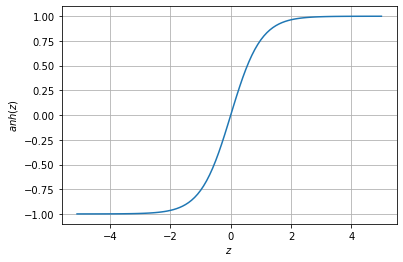

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.1, 5.1, 0.1)
y = np.tanh(x)

plt.plot(x,y)
plt.grid()
plt.xlabel('$z$')
plt.ylabel('$\tanh(z)$')
plt.show()

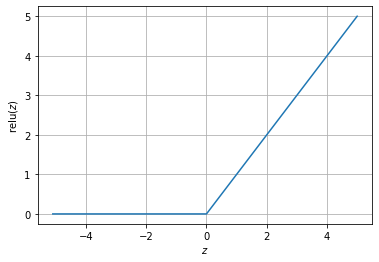

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.1, 5.1, 0.1)
y = np.maximum(0.0, x)

plt.plot(x,y)
plt.grid()
plt.xlabel('$z$')
plt.ylabel('$\operatorname{relu}(z)$')
plt.show()

## 3.6 (Deep) Feed-Forward Neural Networks

### Classifying Handwritten Digits using a Feed-Forward Neural Network

In this example, we are going to classify handwritten digits from the famous [MNIST dataset](http://yann.lecun.com/exdb/mnist/) using a feed-forward neural network. This is an example that you will probably see in the recommended textbooks. The MNIST dataset consist of 70,000 handwritten digits that come as 28x28 grayscale images. In the original dataset, each pixel is given as an integer value between 0 (white) and 255 (black).

Let us first look at some of the handwritten digits, so that we get a feel for the data.

11501568/11490434 [==============================] - 1s 0us/step


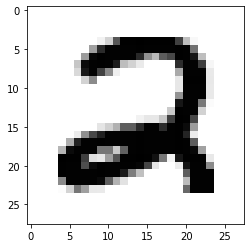

Class: 2


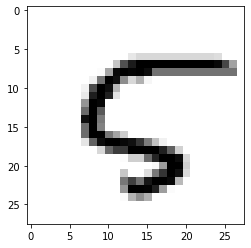

Class: 5


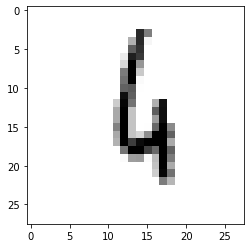

Class: 4


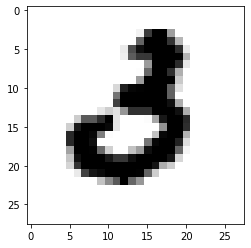

Class: 3


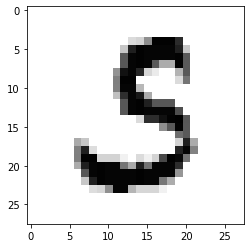

Class: 5


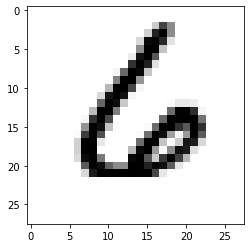

Class: 6


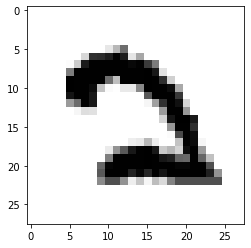

Class: 2


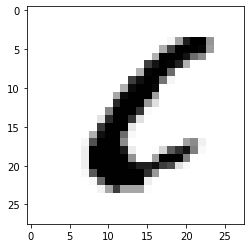

Class: 6


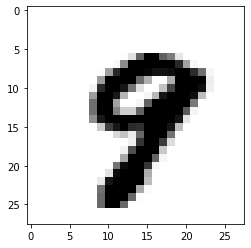

Class: 9


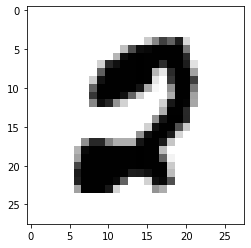

Class: 2


In [8]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras.datasets import mnist

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# select a random sample of ten data points
samples = np.random.randint(0, len(X_train), 10)

# plot the handwritten digits
for s in samples:
    digit = X_train[s]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()
    print('Class: %d' % y_train[s])

Next, we are going to use a feed-forward neural network to classify those handwritten digits into ten classes (0-9). The network consists of three hidden layers (with 128, 64, and 32) neurons for which we use ReLU as an activation function. The output layer consists of ten neurons, and we use SoftMax to transform the activations, so that they can be interpreted as class probabilities.

As a first step, we need to reshape the images, so that each image is a 784-dimensional vector. To this end, we iterate through the pixels of each image row by row. Moreover, we normalize the components of those vectors by dividing them by 255. For the class labels one-hot encoding is employed, so that class labels are mapped to vectors in which only one of the components is one and all others are zero. As a concrete example, the class label 3 would be mapped to the vector [0,0,0,1,0,0,0,0,0,0].

As a loss function we use categorical cross-entropy, which can be thought of as the generalization of binary cross-entropy to more than two classes. The model is trained for 150 epochs and we use 20% of the available training data as validation data to monitor whether and when the model starts to overfit.

In [9]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape (28 x 28) images into (784 x 1)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the data
X_train /= 255
X_test /= 255

# one-hot encode the class labels (0-9)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# describe model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train model
history = model.fit(X_train, Y_train, batch_size=100, epochs=150, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
480/480 [==============================] - 1s 1ms/step - loss: 1.4481 - accuracy: 0.5989 - val_loss: 0.6260 - val_accuracy: 0.8439
Epoch 2/150
480/480 [==================

This model achieves an accuracy above 97% on our test data. However, as you can see from the loss and accuracy values printed out for the training and validation data after each epoch, the model starts overfitting slightly at around epoch 90. While the loss and the accuracy keep improving on the training data, they stagnate and start deteriorating on the validation data. We can obtain the loss and accuracy values for the training data and validation data from the history of the model and plot them to see this more clearly.

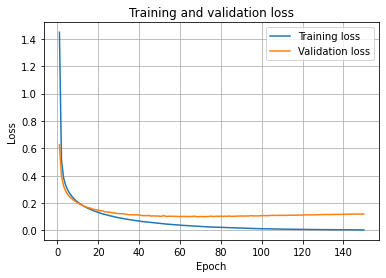

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.title('Training and validation loss')
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

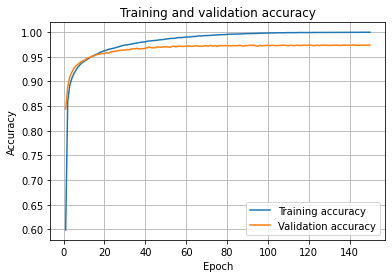

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)
plt.title('Training and validation accuracy')
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### Classifying Movie Reviews using a Feed-Forward Neural Network

As a second concrete example, we will look at a feed-forward neural network that can classify movie reviews from [IMDB](https://www.imdb.com) according to whether they are positive or negative. This is another dataset that is built into Keras and thus easily usable. This example is strongly inspired by Chapter 3.4 in F. Chollet: Deep Learning with Python. The feed-forward network used relies on three hidden layers, one with 32 and another with 16 neurons using ReLU as an activation function. Its output layer consists of a single Sigmoid Neuron, which makes sense given that this is a binary classification problem. Later on in this course, we will see different ways how text inputs, such as the movie reviews in this example, can be represented and fed into a neural network.

The implementation considers only the 5000 most frequent words from the dataset. Each movie review is converted into a binary vector with 5000 components, each of which indicates whether the corresponding word is present in the movie review. Note that you can change the number of words that is considered by modifying the value of `num_words`.

In [12]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers

# number of most frequent words to consider
num_words = 5000

# load IMDB dataset using only the 5,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# let us print out one of the reviews (? indicates a non-frequent word)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("Example review: " + decoded_review)

# for this example, we use a simple representation of reviews as binary 5,000-dimensional vectors
def vectorize_sequences(sequences, dimensions=num_words):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(num_words,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

1654784/1641221 [==============================] - 0s 0us/step
Example review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly ? was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little ? that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big ? for the whole film but these children are amaz

As we can see, this relatively simple architecture achieves an accuracy of more than 86% on our test data. However, again it becomes clear that the model starts overfitting: while the accuracy and the loss keep improving on the training data, they start deteriorating on the validation data. This phenomenon is visualized in the loss and accuracy plots below.

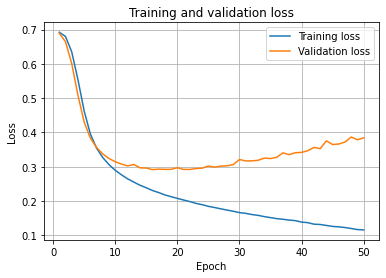

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.title('Training and validation loss')
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

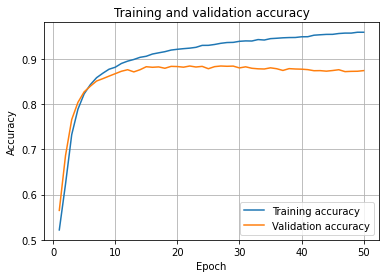

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)
plt.title('Training and validation accuracy')
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## 3.7 Overfitting in Feed-Forward Neural Networks

To avoid overfitting in feed-forward neural networks, we have several options. As a first option, we can add a regularization term to the loss function to penalize complex models. Depending on which regularizer we use, this will lead to many parameters that are close to zero (L2) or actually zero (L1). As a second option, we can use dropout. When using dropout, in each epoch, a random subset of the neurons (how many is controlled by the dropout probability) is dropped, which can be understood as setting their activation to zero. 

### Classifying Handwritten Digits using a Feed-Forward Neural Network

We modify our above example for classifying handwritten digits by adding L2 regularization to each of the hidden layers. The hyperparameter `alpha` controls the strength of regularization. For simplicity, we use the same value of `alpha` for all three hidden layers.

In [15]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from keras import regularizers

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape (28 x 28) images into (784 x 1)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the data
X_train /= 255
X_test /= 255

# one-hot encode the class labels (0-9)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# regularization strength (we use the same for all hidden layers)
alpha = 0.001

# describe model architecture
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(alpha), input_shape=(784,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(alpha)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(alpha)))
model.add(Dense(10, activation='softmax'))
model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train model
history = model.fit(X_train, Y_train, batch_size=100, epochs=150, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
480/480 [==============================] - 1s 1ms/step - loss: 1.8356 - accuracy: 0.5733 - val_loss: 1.0662 - val_accuracy: 0.8208
Epoch 2/150
480/480 [================

As we can see, the accuracy on our test data has improved slightly. Now, we modify our above example by adding dropout to each of the hidden layers. The dropout probability (`drop_prob`) is set as $0.5$, which is a common choice in practice.

In [16]:
# turn off tensorflow info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils

# download MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape (28 x 28) images into (784 x 1)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the data
X_train /= 255
X_test /= 255

# one-hot encode the class labels (0-9)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# dropout probability
drop_prob = 0.5

# describe model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(drop_prob))
model.add(Dense(64, activation='relu'))
model.add(Dropout(drop_prob))
model.add(Dense(32, activation='relu'))
model.add(Dropout(drop_prob))
model.add(Dense(10, activation='softmax'))
model.summary()

# compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train model
history = model.fit(X_train, Y_train, batch_size=100, epochs=150, verbose=1, validation_split=0.2)

# compute loss and accuracy on test data
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 10)               

***
# Some Ideas for Next Steps

To get familiar with Keras and hone your coding skills, I recommend that you modify the above examples. Here are some ideas for things to try out:
- Modify the architectures of the above neural networks, for instance, by adding additional layers, changing the activation function, or modifying the number of neurons per hidden layer
- Zalando has released [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) as a drop-in replacement for MNIST. It is a dataset that looks exactly like the MNIST dataset, but consists of grayscale images of clothes. Use that dataset instead of MNIST and see how well the neural networks perform.
- The above feed-forward neural networks consider each pixel in an MNIST image in isolation. That is, the location of the pixels in the image does not play a role, nor does the model recognize any spatial patterns (e.g., a group of black pixels) in the images. To see this, you can determine a random permutation of the pixels (e.g., pixel at position 0 gets mapped to 171, pixel at position 171 gets mapped to 267 etc.) and apply the same permutation to all images. The performance of the neural network will not change (except for random effects due to batch sampling).
- Try adding regularization and/or dropout to the neural network for movie classification. It clearly overfits as we can see from the increasing validation loss and decreasing validation accuracy.
- Modify the representation of the movie reviews. Instead of using a 10000-dimensional binary vector, you could use a vector that keeps word counts (i.e., how often a word occurs in the review).